In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
trainset = pd.read_csv('train.csv')
X = trainset.drop(trainset.columns[[0,1]],axis=1)
y = pd.DataFrame(trainset['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

LinearRegression()

In [4]:
y_pred = pd.DataFrame(regr.predict(X_test))

In [5]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
display(RMSE)

2.6142061016711955e-13

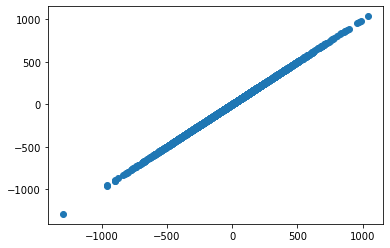

In [6]:
plt.scatter(y_test, y_pred)